In [21]:
import pandas as pd

import sys
from pathlib import Path
# Add the parent directory to the sys.path (without this we cannot import constants or scripts)
sys.path.insert(0, str(Path.cwd().parent))
from src.plotting import plot_comparison_GER_HIC_GLO, plot_value_per_year_GER_HIC_GLO

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
DATA_PATH = '../data/final'
OUTPUT_PATH = 'output'
cvd_data_path = f'{DATA_PATH}/gbd_cardiovascular_allAges_final.csv'
YEAR_COLUMN_NAME = 'year'
VALUE_COLUMN_NAME = 'val'

## Load Data

In [8]:
df = pd.read_csv(cvd_data_path)
df = df[df['metric_name'] == 'Rate']    
df

,measure_name,location_name,metric_name,year,val,Country Code
1,Deaths,Global,Rate,1990,225.584376,GLB
3,Deaths,Timor-Leste,Rate,1990,79.809246,TLS
5,Deaths,Japan,Rate,1990,224.741352,JPN
7,Deaths,Uruguay,Rate,1990,365.135355,URY
9,Deaths,Greece,Rate,1990,439.652854,GRC
...,...,...,...,...,...,...
24711,Incidence,Sierra Leone,Rate,2015,355.473682,SLE
24713,Incidence,Sierra Leone,Rate,2016,355.201957,SLE
24715,Incidence,Sierra Leone,Rate,2017,355.453785,SLE
24717,Incidence,Sierra Leone,Rate,2018,357.173519,SLE


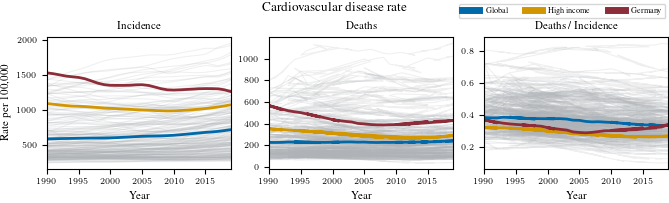

In [19]:
%autoreload 2

plot_comparison_GER_HIC_GLO(df=df, year_column=YEAR_COLUMN_NAME, value_column=VALUE_COLUMN_NAME,
                            title='Cardiovascular disease rate', country_column='location_name', indicator1='Incidence', 
                            indicator2='Deaths', indicator_column='measure_name', xlabel='Year', ylabel='Rate per 100,000')

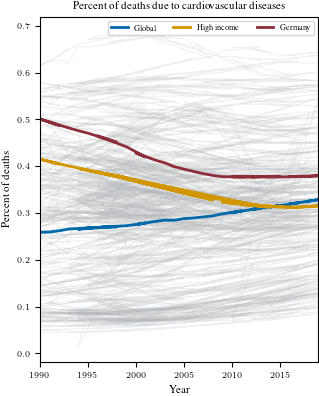

In [22]:
df = pd.read_csv(cvd_data_path)
df = df[(df['metric_name'] == 'Percent') & (df['measure_name'] == 'Deaths')]

%autoreload 2

plot_value_per_year_GER_HIC_GLO(df=df, year_column=YEAR_COLUMN_NAME, value_column=VALUE_COLUMN_NAME, title='Percent of deaths due to cardiovascular diseases',
                                country_column='location_name', xlabel='Year', ylabel='Percent of deaths')

In [26]:
percentage = df[(df['location_name'] == 'Germany') & (df['year'] == 2019)]['val'].values[0] * 100
formatted_percentage = "{:.2f}%".format(percentage)
print(f"Germany 2019 percent of deaths due to cardiovascular diseases: {formatted_percentage}")

Germany 2019 percent of deaths due to cardiovascular diseases: 37.95%
